时间序列经常通过折线图绘制。时间序列用于统计，信号处理，模式识别，计量经济学，数学金融，天气预报，地震预测，脑电图，控制工程，天文学，通信工程，以及主要涉及时间测量的任何应用科学和工程领域。

时间序列分析包括用于分析时间序列数据的方法，以便提取有意义的统计数据和数据的其他特征。时间序列预测是使用模型根据先前观察到的值预测未来值。虽然回归分析通常采用的方式是测试理论，即一个或多个独立时间序列的当前值会影响另一个时间序列的当前值，但这种时间序列分析不称为“时间序列分析”，其重点是比较不同时间点的单个时间序列或多个相关时间序列的值。中断时间序列 分析是对单个时间序列的干预分析。

时间序列数据具有自然的时间顺序。这使得时间序列分析不同于横断面研究，其中没有观察的自然顺序（例如，通过参考其各自的教育水平来解释人们的工资，其中个体的数据可以以任何顺序输入）。时间序列分析也不同于空间数据分析，其中观测通常与地理位置相关（例如，通过位置来计算房价以及房屋的内在特征）。一个随机的时间序列的模型通常会反映出这样一个事实，即与时间紧密相连的观测结果将比进一步分开的观察结果更加密切相关。此外，时间序列模型通常会利用时间的自然单向排序，因此给定时期的值将表示为从过去的值中获得，而不是从未来的值中获得（参见时间可逆性）。

时间序列分析可应用于实值，连续数据，离散 数字数据或离散符号数据（即字符序列，如英语中的字母和单词）。

时间序列的常用算法包括移动平均（MA, Moving Average）、指数平滑（ES, Exponen-tial Smoothing）、差分自回归移动平均模型（ARIMA , Auto-regressive Integrated Moving Average Model）三大主要类别，每个类别又可以细分和延伸出多种算法。

当数据集规模较大、数据粒度丰富时，我们可以选择多种时间序列的预测模式。时间序列的数据粒度可分为秒、分、小时、天、周、月、季度、年等，不同的粒度都可以用来做时间序列预测。
假如有3650天（完整10年）以每分钟时间戳为粒度的数据，那么这份数据集会有5256 000（60分钟*24小时*365天*10年）条记录。基于该数据集预测今天的总数据，可以考虑的时间序列模式有三种：

+ 整合模式：将历史数据按每天数据进行汇总，得到按天为粒度的共计3650条时间序列数据；然后应用所有数据集做时间序列分析，预测的时间序列项目为1（天）。
+ 横向模式：将历史数据按每小时做汇总，得到按小时为粒度87600条时间序列数据；然后将要预测的1天划分为24小时（即24个预测点），这样会形成24个预测模型，每个模型只预测对应的小时点数据，预测的时间序列项目为1（小时）；最后将预测得到的24个小时点的数据求和得到今天的总数据。
+ 纵向模式：这种模式的粒度更细，无需对历史数据做任何形式的汇总，这样有525600条时间序列数据。将要预测的1天划分为1440个分钟点（60分钟*24小时），这样会形成1440个预测模型，每个模型只预测对应的分钟点的数据，预测的时间序列项目为1（分钟）；最后将预测得到的1440个分钟点的数据求和得到今天的总数据。

这三种方式的训练集都是3650条，即按天为粒度的数据。横向模式和纵向模式由于做更细的粒度切分，因此需要更多的模型，这意味着需要更多的时间来做训练和预测。当第一种整合模式不能满足需求或者预测结果不佳时，可以尝试后两种模式。

平稳性是做时间序列分析的前提条件，所谓平稳通俗理解就是数据没有随着时间呈现明显的趋势和规律，例如剧烈波动、递增、递减等，而是相对均匀且随机地分布在均值附近。在ARIMA模型中的I就是对数据做差分以实现数据的平稳，而ARIMA关键参数p、d、q中的d即时间序列成为平稳时所做的差分次数。
如何判断时间序列数据是否需要平稳性处理？一般有三种方法：
+ 观察法：通过输出时间序列图发现数据是否平稳。本示例中的adf_val函数便含有该方法。
+ 自相关和偏相关法：通过观察自相关和偏相关的系数分析数据是否平稳。
+ ADF检验：通过ADF检验得到的显著性水平分析数据是否平稳。本示例中的adf_val函数便有含有该方法。

实现数据的平稳有以下几种方法：

+ 对数法：对数处理可以减小数据的波动，使其线性规律更加明显。但需要注意的是对数处理只能针对时间序列的值大于0的数据集。
+ 差分法：一般来说，非纯随机的时间序列经一阶差分或者二阶差分之后就会变得平稳（statsmodels的ARIMA模型自动支持数据差分，但最大为2阶差分）。
+ 平滑法：根据平滑技术的不同，可分为移动平均法和指数平均法，这两个都是最基本的时间序列方法。
+ 分解法：将时序数据分离成不同的成分，包括成长期趋势、季节趋势和随机成分等。

白噪声（white noise）检验也称为随机性检验，用于检验时间序列的各项数值之间是否具有任何相关关系，白噪声分布是应用时间序列分析的前提。检测时间序列是否属于随机性分布，可通过图形法和Ljung Box法检验。
+ 图形法：时间序列应该是围绕均值随机性上下分布的状态。
+ Ljung Box法：是对时间序列是否存在滞后相关的一种统计检验，判断序列总体的相关性或者说随机性是否存在。
白噪声检验通常和数据平稳性检验是协同进行数据检验的，这意味着如果平稳性检验通过，白噪声检验一般也会通过。

In [1]:
import pandas as pd  # pandas库
import numpy as np  # numpy库
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # acf和pacf展示库
from statsmodels.tsa.stattools import adfuller  # adf检验库
from statsmodels.stats.diagnostic import acorr_ljungbox  # 随机性检验库
from statsmodels.tsa.arima_model import ARMA  # ARMA库
import matplotlib.pyplot as plt  # matplotlib图形展示库
import prettytable  # 导入表格库
# 由于pandas判断周期性时会出现warning，这里忽略提示
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### 读取数据 ####
# 创建解析列的功能对象
date_parse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y') 
# 读取数据
df = pd.read_table('https://raw.githubusercontent.com/ffzs/dataset/master/time_series.txt', delimiter='\t', index_col='date', date_parser=date_parse)  
# 将列转换为float32类型
ts_data = df['number'].astype('float32') 
print ('data summary') 
# 打印输出时间序列数据概况
print (ts_data.describe()) 

data summary
count    149.000000
mean     164.382553
std       75.097740
min       47.000000
25%      100.000000
50%      156.000000
75%      201.000000
max      400.000000
Name: number, dtype: float64


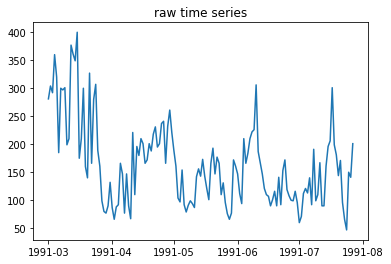

stochastic score
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
|         adf         |         pvalue        | usedlag | nobs |                                  critical_values                                  |       icbest       |
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
| -3.7642778196383406 | 0.0032946903802968273 |    11   | 137  | {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603} | 1405.3846604574503 |
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
stationarity score
+---------------+------------------+
|    lbvalue    |      pvalue      |
+---------------+------------------+
| [

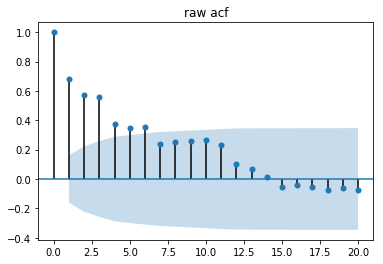

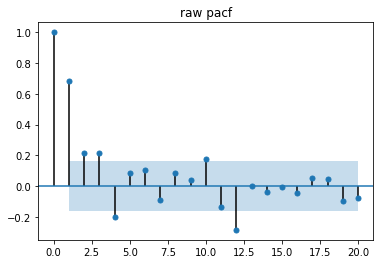

In [15]:
# 多次用到的表格
def pre_table(table_name, table_rows):
    '''
    :param table_name: 表格名称，字符串列表
    :param table_rows: 表格内容，嵌套列表
    :return: 展示表格对象
    '''
    table = prettytable.PrettyTable()  # 创建表格实例
    table.field_names = table_name  # 定义表格列名
    for i in table_rows:  # 循环读多条数据
        table.add_row(i)  # 增加数据
    return table


# 稳定性（ADF）检验
def adf_val(ts, ts_title, acf_title, pacf_title):
    '''
    :param ts: 时间序列数据，Series类型
    :param ts_title: 时间序列图的标题名称，字符串
    :param acf_title: acf图的标题名称，字符串
    :param pacf_title: pacf图的标题名称，字符串
    :return: adf值、adf的p值、三种状态的检验值
    '''
    plt.figure()
    plt.plot(ts)  # 时间序列图
    plt.title(ts_title)  # 时间序列标题
    plt.show()
    plot_acf(ts, lags=20, title=acf_title).show()  # 自相关检测
    plot_pacf(ts, lags=20, title=pacf_title).show()  # 偏相关检测
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(ts)  # 稳定性（ADF）检验
    table_name = ['adf', 'pvalue', 'usedlag', 'nobs', 'critical_values', 'icbest']  # 表格列名列表
    table_rows = [[adf, pvalue, usedlag, nobs, critical_values, icbest]]  # 表格行数据，嵌套列表
    adf_table = pre_table(table_name, table_rows)  # 获得平稳性展示表格对象
    print ('stochastic score')  # 打印标题
    print (adf_table)  # 打印展示表格
    return adf, pvalue, critical_values,  # 返回adf值、adf的p值、三种状态的检验值


# 白噪声（随机性）检验
def acorr_val(ts):
    '''
    :param ts: 时间序列数据，Series类型
    :return: 白噪声检验的P值和展示数据表格对象
    '''
    lbvalue, pvalue = acorr_ljungbox(ts, lags=1)  # 白噪声检验结果
    table_name = ['lbvalue', 'pvalue']  # 表格列名列表
    table_rows = [[lbvalue, pvalue]]  # 表格行数据，嵌套列表
    acorr_ljungbox_table = pre_table(table_name, table_rows)  # 获得白噪声检验展示表格对象
    print ('stationarity score')  # 打印标题
    print (acorr_ljungbox_table)  # 打印展示表格
    return pvalue  # 返回白噪声检验的P值和展示数据表格对象


##### 原始数据检验 ####
# 稳定性检验
adf, pvalue1, critical_values = adf_val(ts_data, 'raw time series', 'raw acf', 'raw pacf')  
# 白噪声检验
pvalue2 = acorr_val(ts_data)  

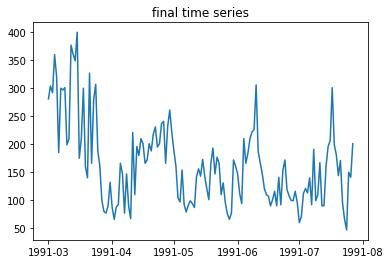

stochastic score
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
|         adf         |         pvalue        | usedlag | nobs |                                  critical_values                                  |       icbest       |
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
| -3.7642778196383406 | 0.0032946903802968273 |    11   | 137  | {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603} | 1405.3846604574503 |
+---------------------+-----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
stationarity score
+---------------+------------------+
|    lbvalue    |      pvalue      |
+---------------+------------------+
| [

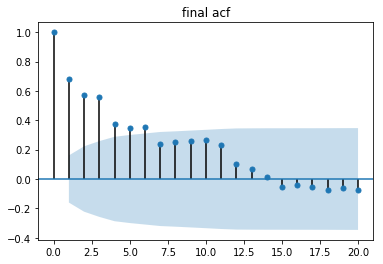

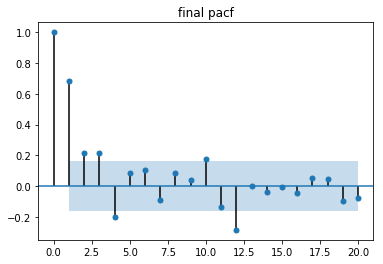

In [16]:
# 数据平稳处理
def get_best_log(ts, max_log=5, rule1=True, rule2=True):
    '''
    :param ts: 时间序列数据，Series类型
    :param max_log: 最大log处理的次数，int型
    :param rule1: rule1规则布尔值，布尔型
    :param rule2: rule2规则布尔值，布尔型
    :return: 达到平稳处理的最佳次数值和处理后的时间序列
    '''
    if rule1 and rule2:  # 如果两个规则同时满足
        return 0, ts  # 直接返回0和原始时间序列数据
    else:  # 只要有一个规则不满足
        for i in range(1, max_log):  # 循环做log处理
            ts = np.log(ts)  # log处理
            adf, pvalue1, usedlag, nobs, critical_values, icbest = adfuller(ts)  # 稳定性（ADF）检验
            lbvalue, pvalue2 = acorr_ljungbox(ts, lags=1)  # 白噪声（随机性）检验
            rule_1 = (adf < critical_values['1%'] and adf < critical_values['5%'] and adf < critical_values[
                '10%'] and pvalue1 < 0.01)  # 稳定性（ADF）检验规则
            rule_2 = (pvalue2 < 0.05)  # 白噪声（随机性）规则
            rule_3 = (i < 5)
            if rule_1 and rule_2 and rule_3:  # 如果同时满足条件
                print ('The best log n is: {0}'.format(i))  # 打印输出最佳次数
                return i, ts  # 返回最佳次数和处理后的时间序列

# 还原经过平稳处理的数据
def recover_log(ts, log_n):
    '''
    :param ts: 经过log方法平稳处理的时间序列，Series类型
    :param log_n: log方法处理的次数，int型
    :return: 还原后的时间序列
    '''
    for i in range(1, log_n + 1):  # 循环多次
        ts = np.exp(ts)  # log方法还原
    return ts  # 返回时间序列

#### 对时间序列做稳定性处理 #####
# 稳定性检验规则
rule1 = (adf < critical_values['1%'] and adf < critical_values['5%'] and adf < critical_values[
    '10%'] and pvalue1 < 0.01)  
# 白噪声检验的规则
rule2 = (pvalue2[0,] < 0.05)  
# 由于statsmodels最多只能2阶差分，有可能不能满足要求，使用log进行稳定性处理
log_n, ts_data = get_best_log(ts_data, max_log=5, rule1=rule1, rule2=rule2)

#### 稳定后数据进行检验 ####
# 稳定性检验
adf, pvalue1, critical_values = adf_val(ts_data, 'final time series', 'final acf', 'final pacf')  
# 白噪声检验
pvalue2 = acorr_val(ts_data)  

each p/q traning record
p  q           aic          bic         hqic
 0| 0|1712.83986227|1718.84775488|1715.28076972
 0| 1|1653.44670199|1662.45854091|1657.10806316
 0| 2|1648.86852300|1660.88430822|1653.75033789
 0| 3|1618.67655533|1633.69628686|1624.77882396
 0| 4|1619.72007053|1637.74374837|1627.04279288
 0| 5|1619.72007053|1637.74374837|1627.04279288
 0| 6|1601.91472705|1625.94629749|1611.67835684
 0| 7|1603.49022972|1630.52574647|1614.47431324
 0| 8|1603.31091781|1633.35038087|1615.51545505
 0| 9|1605.30982083|1638.35323019|1618.73481180
 0|10|1605.30982083|1638.35323019|1618.73481180
 0|11|1605.30982083|1638.35323019|1618.73481180
 0|12|1605.30982083|1638.35323019|1618.73481180
 0|13|1605.30982083|1638.35323019|1618.73481180
 0|14|1605.30982083|1638.35323019|1618.73481180
 1| 0|1607.86064313|1616.85227996|1611.51392440
 1| 1|1597.51947430|1609.50832339|1602.39051599
 1| 2|1599.22422154|1614.21028291|1605.31302366
 1| 3|1598.65155035|1616.63482400|1605.95811289
 1| 4|1589.85410466

11| 5|1438.91992640|1491.61049274|1460.33207016
11| 6|1450.26971129|1505.88753131|1472.87141859
11| 7|1450.26852297|1508.81359667|1474.05979381
11| 8|1450.26852297|1508.81359667|1474.05979381
11| 9|1450.26852297|1508.81359667|1474.05979381
11|10|1450.26852297|1508.81359667|1474.05979381
11|11|1450.26852297|1508.81359667|1474.05979381
11|12|1450.26852297|1508.81359667|1474.05979381
11|13|1450.26852297|1508.81359667|1474.05979381
11|14|1450.26852297|1508.81359667|1474.05979381
12| 0|1442.45936607|1483.33909903|1459.07189637
12| 1|1442.66057756|1486.46029145|1460.45971717
12| 2|1444.65391793|1491.37361274|1463.63966684
12| 3|1444.56681868|1494.20649442|1464.73917691
12| 4|1436.11459528|1488.67425194|1457.47356281
12| 5|1430.11549214|1485.59512973|1452.66106898
12| 6|1432.10563067|1490.50524918|1455.83781681
12| 7|1433.75328470|1495.07288414|1458.67208015
12| 8|1433.85914139|1498.09872176|1459.96454615
12| 9|1433.58632535|1500.74588664|1460.87833941
12|10|1427.00441553|1497.08395775|1455.4

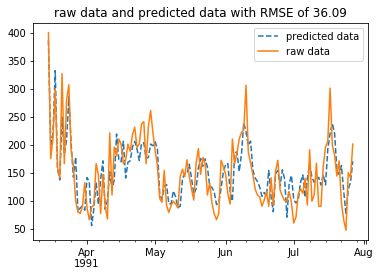

In [8]:
# arma最优模型训练
def arma_fit(ts):
    '''
    :param ts: 时间序列数据，Series类型
    :return: 最优状态下的p值、q值、arma模型对象、pdq数据框和展示参数表格对象
    '''
    max_count = int(len(ts) / 10)  # 最大循环次数最大定义为记录数的10%
    bic = float('inf')  # 初始值为正无穷
    tmp_score = []  # 临时p、q、aic、bic和hqic的值的列表
    print ('each p/q traning record') # 打印标题
    print('p  q           aic          bic         hqic')
    for tmp_p in range(max_count + 1):  # p循环max_count+1次
        for tmp_q in range(max_count + 1):  # q循环max_count+1次
            model = ARMA(ts, order=(tmp_p, tmp_q))  # 创建ARMA模型对象
            try:
                # ARMA模型训练 disp不打印收敛信息 method条件平方和似然度最大化
                results_ARMA = model.fit(disp=-1, method='css')  
            except:
                continue  # 遇到报错继续
            finally:
                tmp_aic = results_ARMA.aic  # 模型的获得aic
                tmp_bic = results_ARMA.bic  # 模型的获得bic
                tmp_hqic = results_ARMA.hqic  # 模型的获得hqic
                print('{:2d}|{:2d}|{:.8f}|{:.8f}|{:.8f}'.format(tmp_p, tmp_q, tmp_aic, tmp_bic, tmp_hqic))
                tmp_score.append([tmp_p, tmp_q, tmp_aic, tmp_bic, tmp_hqic])  # 追加每个模型的训练参数和结果
                if tmp_bic < bic:  # 如果模型bic小于最小值，那么获得最优模型ARMA的下列参数：
                    p = tmp_p  # 最优模型ARMA的p值
                    q = tmp_q  # 最优模型ARMA的q值
                    model_arma = results_ARMA  # 最优模型ARMA的模型对象
                    aic = tmp_bic  # 最优模型ARMA的aic
                    bic = tmp_bic  # 最优模型ARMA的bic
                    hqic = tmp_bic  # 最优模型ARMA的hqic
    pdq_metrix = np.array(tmp_score)  # 将嵌套列表转换为矩阵
    pdq_pd = pd.DataFrame(pdq_metrix, columns=['p', 'q', 'aic', 'bic', 'hqic'])  # 基于矩阵创建数据框
    table_name = ['p', 'q', 'aic', 'bic', 'hqic']  # 表格列名列表
    table_rows = [[p, q, aic, bic, hqic]]  # 表格行数据，嵌套列表
    parameter_table = pre_table(table_name, table_rows)  # 获得最佳ARMA模型结果展示表格对象
#     print ('each p/q traning record')  # 打印标题
#     print (pdq_pd)  # 打印输出每次ARMA拟合结果，包含p、d、q以及对应的AIC、BIC、HQIC
    print ('best p and q')  # 打印标题
    print (parameter_table)  # 输出最佳ARMA模型结果展示表格对象
    return model_arma  # 最优状态下的arma模型对象


# 模型训练和效果评估
def train_test(model_arma, ts, log_n, rule1=True, rule2=True):
    '''
    :param model_arma: 最优ARMA模型对象
    :param ts: 时间序列数据，Series类型
    :param log_n: 平稳性处理的log的次数，int型
    :param rule1: rule1规则布尔值，布尔型
    :param rule2: rule2规则布尔值，布尔型
    :return: 还原后的时间序列
    '''
    train_predict = model_arma.predict()  # 得到训练集的预测时间序列
    if not (rule1 and rule2):  # 如果两个条件有任意一个不满足
        train_predict = recover_log(train_predict, log_n)  # 恢复平稳性处理前的真实时间序列值
        ts = recover_log(ts, log_n)  # 时间序列还原处理
    ts_data_new = ts[train_predict.index]  # 将原始时间序列数据的长度与预测的周期对齐
    RMSE = np.sqrt(np.sum((train_predict - ts_data_new) ** 2) / ts_data_new.size)  # 求RMSE
    # 对比训练集的预测和真实数据
    plt.figure()  # 创建画布
    train_predict.plot(label='predicted data', style='--')  # 以虚线展示预测数据
    ts_data_new.plot(label='raw data')  # 以实线展示原始数据
    plt.legend(loc='best')  # 设置图例位置
    plt.title('raw data and predicted data with RMSE of %.2f' % RMSE)  # 设置标题
    plt.show()  # 展示图像
    return ts  # 返回还原后的时间序列

# 训练最佳ARMA模型并输出相关参数和对象
model_arma = arma_fit(ts_data)
# 模型训练和效果评估
ts_data = train_test(model_arma, ts_data, log_n, rule1=rule1, rule2=rule2)

-----------predict data----------
1991-07-28    180.324135
1991-07-29    163.852458
1991-07-30    149.992696
1991-07-31    171.999813
1991-08-01    140.003496
1991-08-02    125.021993
Freq: D, dtype: float64


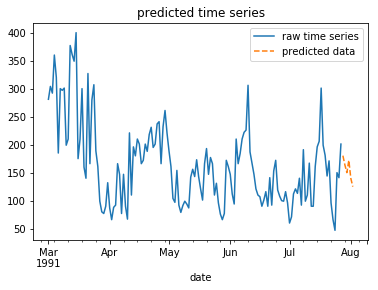

In [9]:
# 预测未来指定时间项的数据
def predict_data(model_arma, ts, log_n, start, end, rule1=True, rule2=True):
    '''
    :param model_arma: 最优ARMA模型对象
    :param ts: 时间序列数据，Series类型
    :param log_n: 平稳性处理的log的次数，int型
    :param start: 要预测数据的开始时间索引
    :param end: 要预测数据的结束时间索引
    :param rule1: rule1规则布尔值，布尔型
    :param rule2: rule2规则布尔值，布尔型
    :return: 无
    '''
    predict_ts = model_arma.predict(start=start, end=end)  # 预测未来指定时间项的数据
    print ('-----------predict data----------')  # 打印标题
    if not (rule1 and rule2):  # 如果两个条件有任意一个不满足
        predict_ts = recover_log(predict_ts, log_n)  # 还原数据
    print (predict_ts)  # 展示预测数据
    # 展示预测趋势
    plt.figure()  # 创建画布
    ts.plot(label='raw time series')  # 设置推向标签
    predict_ts.plot(label='predicted data', style='--')  # 以虚线展示预测数据
    plt.legend(loc='best')  # 设置图例位置
    plt.title('predicted time series')  # 设置标题
    plt.show()  # 展示图像
    
#### 模型预测应用 ####
# 设置时间
start = '1991-07-28'  
end = '1991-08-02' 
# 预测
predict_data(model_arma, ts_data, log_n, start, end, rule1=rule1, rule2=rule2)  

statsmodels中的ARMA
statsmodels常用的时间序列模型包括AR、ARMA和ARIMA，并都集中在statsmodels. tsa.arima_model下面。ARMA(p, q)是AR(p)和MA(q)模型的组合，关于p和q的选择，一种方法是观察自相关图ACF和偏相关图PACF，通过截尾、拖尾等信息分析应用的模型以及适应的p和q的阶数；另一种方法是通过循环的方法，遍历所有条件并通过AIC、BIC值自动确定阶数。
ARMA（以及statsmodels中的其他算法）跟sklearn中的算法类似，也都有方法和属性两种应用方式。常用的ARMA方法：
+ fit：使用卡尔曼滤波器的最大似然法拟合ARMA模型。
+ from_formula：基于给定的公式和数据框创建模型。
+ geterrors：基于给定的参数获取ARMA进程的错误。
+ hessian：基于给定的参数计算Hessian信息。
+ loglike：计算ARMA模型的对数似然。
+ loglike_css：条件求和方差似然函数。
+ predict：应用ARMA模型做预测。
+ score：得分函数。